In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.figure_factory as ff
import plotly.express as px
import time
from datetime import datetime

In [ ]:
dataset = pd.read_csv("election2024.csv")

In [ ]:
dataset

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849


In [ ]:
dataset.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [ ]:
dataset.tail()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
1595,0716b23c2c0cee3a,male,61.0,central,settlement,named correct date,definitely no,will not take part,over 4 hours a day,less than 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.270761
1596,07168254d14ceb55,female,80.0,volga,village,named correct date,likely yes,struggle to answer,several times a week,does not use internet,college,hard to say,unemployed pensioner,NaN,NaN,0.921724
1597,071690f34d4ce164,female,76.0,northwestern,city with population of 50-100k,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,hard to say,unemployed pensioner,NaN,NaN,1.396691
1598,0716bfa9c48ce79a,female,74.0,central,city with population of less than 50k,not sure or no answer,definitely yes,Putin,over 4 hours a day,over 4 hours a day,academic degree,hard to say,employed pensioner,commercial organization,"industry, manufacturing",0.995849
1599,07168088318cef88,female,76.0,ural,village,named correct date,definitely yes,Putin,over 4 hours a day,over 4 hours a day,school,hard to say,unemployed pensioner,NaN,NaN,0.860836


In [ ]:
dataset.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [ ]:
dataset.federal_district

,federal_district
0,north caucasian
1,north caucasian
2,volga
3,northwestern
4,southern
...,...
1595,central
1596,volga
1597,northwestern
1598,central


In [ ]:
dataset.candidate

,candidate
0,Putin
1,Putin
2,Putin
3,Davankov
4,Putin
...,...
1595,will not take part
1596,struggle to answer
1597,Putin
1598,Putin


In [ ]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(dataset.isnull().sum())


Missing Values in Each Column:
id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

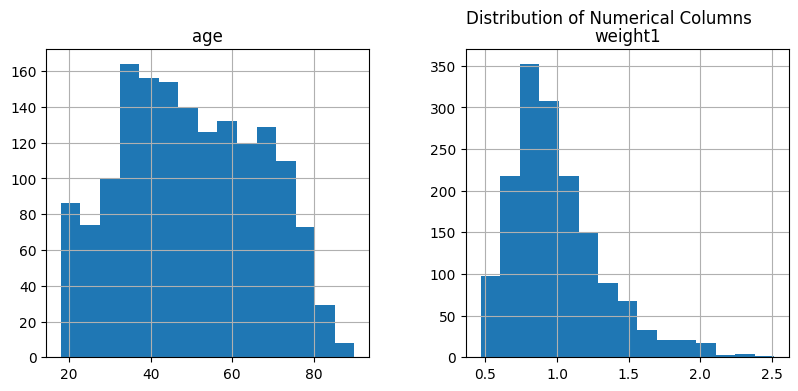

In [ ]:
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
# Visualize distributions of numerical columns
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns

if len(numerical_columns) > 0:
    # Calculate the number of rows and columns needed for the subplot grid
    n_cols = 3  # Fixed number of columns for subplots
    n_rows = np.ceil(len(numerical_columns) / n_cols).astype(int)  # Dynamically calculate number of rows

    # Create the histogram plots
    dataset[numerical_columns].hist(bins=15, figsize=(n_cols*5, n_rows*4), layout=(n_rows, n_cols))
    plt.suptitle('Distribution of Numerical Columns')
    plt.show()
else:
    print("No numerical columns to plot.")


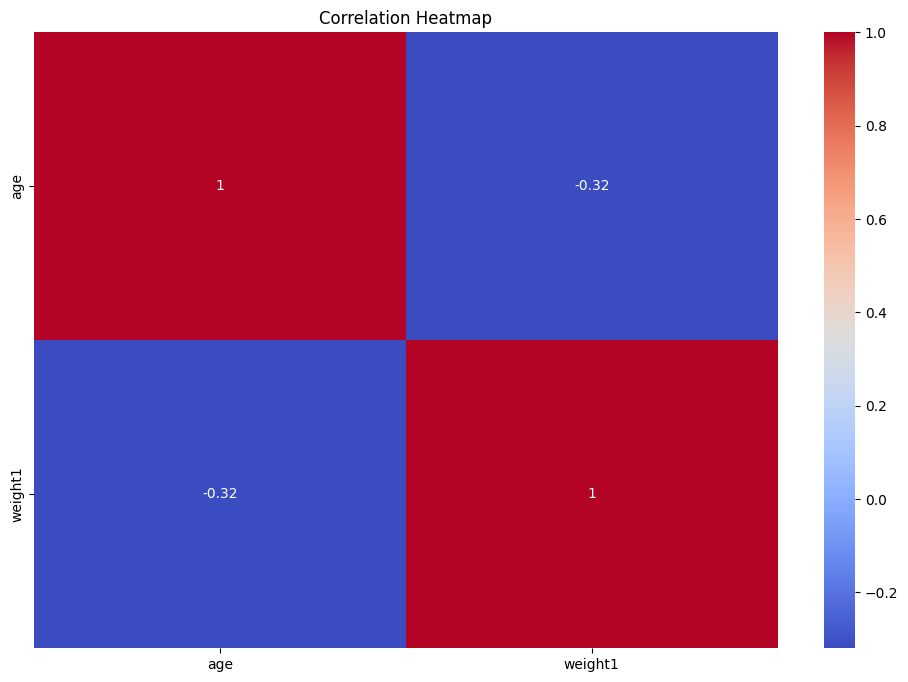

In [ ]:
# Visualize correlations between numerical columns
if len(numerical_columns) > 1:  # Check if there are at least two numerical columns for correlation
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[numerical_columns].corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print("Not enough numerical columns to compute correlations.")